In [12]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

### Carregando e Configurando Dataset

In [13]:
# Caminhos para as pastas de treino e teste
caminho_treino = os.path.join("..", "dataset", "train")
caminho_teste = os.path.join("..", "dataset", "test")

# Divisão de treino e teste
train_dir = caminho_treino
test_dir = caminho_teste

# Configurações do dataset
batch_size = 32
img_size = (128, 128)

# Carregar o dataset de treino
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Carregar o dataset de teste
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Determinar classes
nome_classes = train_dataset.class_names
print("Classes detectadas:", nome_classes)

# Otimização
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 34714 files belonging to 21 classes.
Found 11548 files belonging to 21 classes.
Classes detectadas: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


### Visualizar alguns de nossos Dados

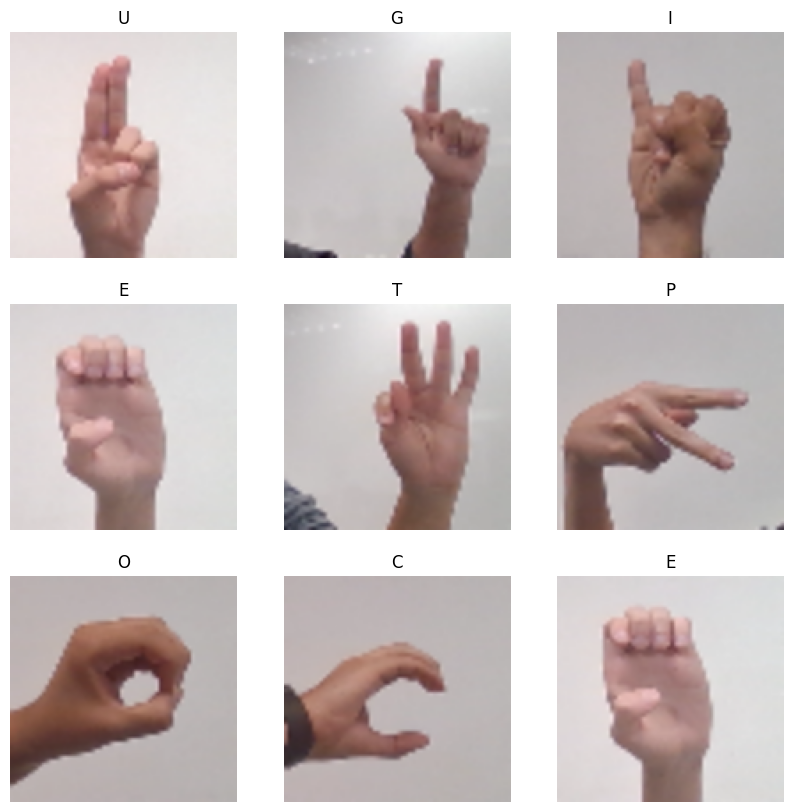

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(nome_classes[labels[i].numpy()])
        plt.axis("off")

### Modelagem e Treinamento da Rede Neural Convolucional

In [15]:
# Construir o modelo
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(len(class_names), activation='softmax')  # Número de classes
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Treinando Modelo
epochs = 100
history = model.fit(
    train_dataset,
    validation_data=test_dataset,  # Validar no conjunto de teste
    epochs=epochs
)

Epoch 1/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - accuracy: 0.6415 - loss: 1.2412 - val_accuracy: 0.8893 - val_loss: 0.5079
Epoch 2/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9881 - loss: 0.0439 - val_accuracy: 0.8915 - val_loss: 0.6171
Epoch 3/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.9935 - loss: 0.0226 - val_accuracy: 0.9199 - val_loss: 0.4624
Epoch 4/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9975 - loss: 0.0102 - val_accuracy: 0.9323 - val_loss: 0.4523
Epoch 5/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.9177 - val_loss: 0.4954
Epoch 6/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9113 - val_loss: 0.5376
Epoch 7/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9297 - val_loss: 0.4517
Epoch 8/100
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 

### Gráficos

361/361 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9405 - loss: 0.9275


Acurácia no conjunto de teste: 0.94


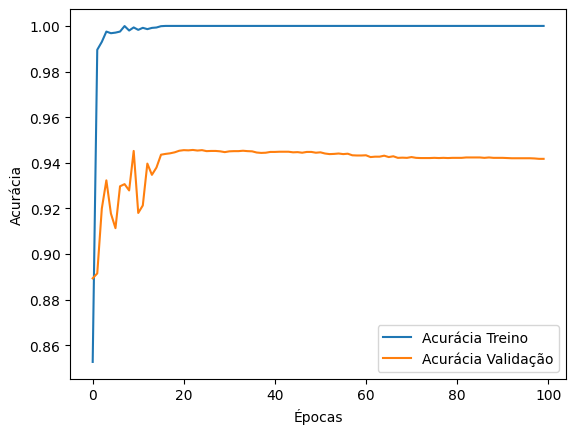

In [ ]:
# Avaliar o modelo no conjunto de teste
loss, acc = model.evaluate(test_dataset)
print(f"Acurácia no conjunto de teste: {acc:.2f}")

# Exibir gráfico de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()


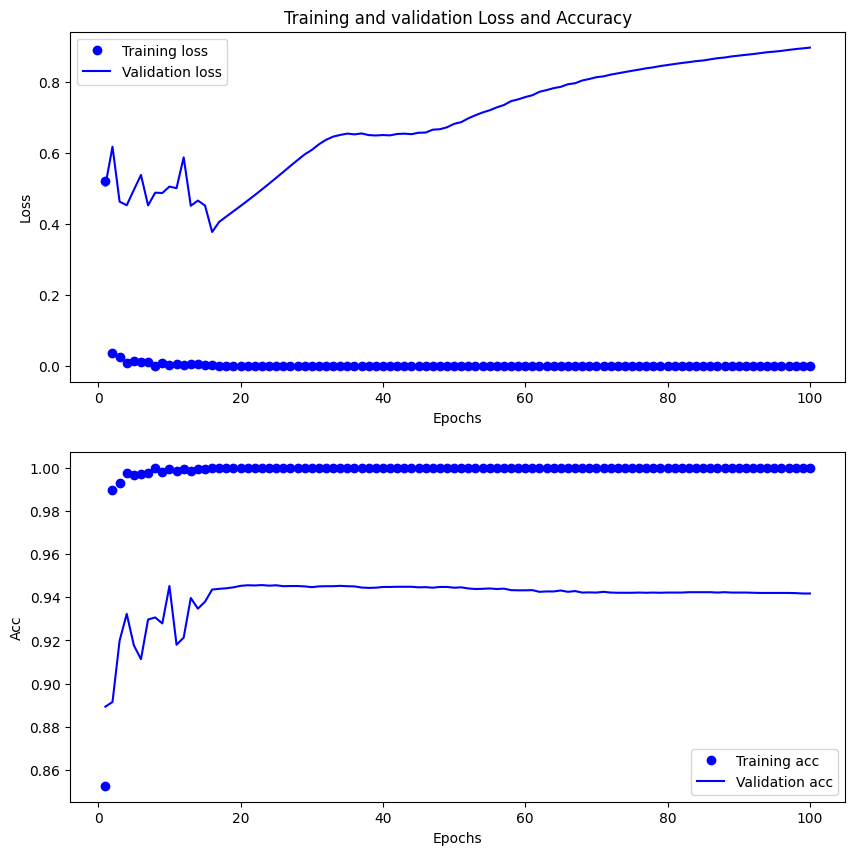

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()